In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('data.csv')
data = data.drop(["High","Low"	,"Open","Close","Volume"], axis=1)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index("Date",inplace=True)

data.head()

,Adj Close
Date,
2000-01-03,0.855797
2000-01-04,0.783644
2000-01-05,0.795112
2000-01-06,0.726304
2000-01-07,0.760708


In [5]:
data.mean()[0]

24.57061042845089

In [3]:
data['day'] = [i.day for i in data.index]
data['day_name'] = [i.day_name() for i in data.index]
data['day_of_year'] = [i.dayofyear for i in data.index]
data['week_of_year'] = [i.weekofyear for i in data.index]
data['hour'] = [i.hour for i in data.index]
data['is_weekday'] = [i.isoweekday() for i in data.index]
data.head()

,Adj Close,day,day_name,day_of_year,week_of_year,hour,is_weekday
Date,,,,,,,
2004-08-19,49.982655,19,Thursday,232,34,0,4
2004-08-20,53.952770,20,Friday,233,34,0,5
2004-08-23,54.495735,23,Monday,236,35,0,1
2004-08-24,52.239197,24,Tuesday,237,35,0,2
2004-08-25,52.802086,25,Wednesday,238,35,0,3


In [4]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

C:\Users\balug\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 5560
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6751.271
Date:                Sun, 06 Feb 2022   AIC                          13514.542
Time:                        15:20:24   BIC                          13554.281
Sample:                             0   HQIC                         13528.395
                               - 5560                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0579      0.004    -13.979      0.000      -0.066      -0.050
ar.L2          0.0223      0.004      5.670      0.000       0.015       0.030
ar.L3         -0.0295      0.005     -6.509      0.0

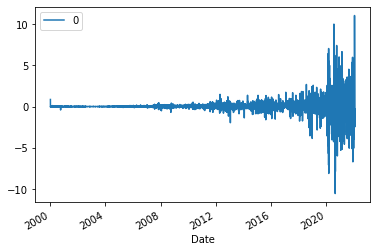

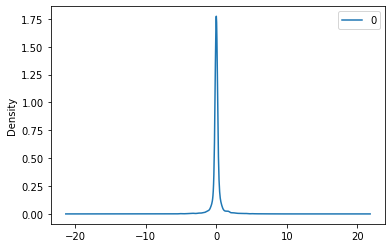

                 0
count  5560.000000
mean      0.033160
std       0.814490
min     -10.551362
25%      -0.057168
50%       0.002022
75%       0.094192
max      11.036285


In [5]:
model = ARIMA(data['Adj Close'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [7]:
from pycaret.anomaly import *
s = setup(data,silent=True,n_jobs=-1)

,Description,Value
0,session_id,592
1,Original Data,"(4398, 7)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(4398, 15)"
9,CPU Jobs,-1


In [8]:
models().index.tolist()

['abod',
 'cluster',
 'cof',
 'iforest',
 'histogram',
 'knn',
 'lof',
 'svm',
 'pca',
 'mcd',
 'sod',
 'sos']

In [9]:
iforest = create_model('iforest', fraction = 0.1)
iforest_results = assign_model(iforest)
iforest_results.head()

,Adj Close,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
Date,,,,,,,,,
2004-08-19,49.982655,19,Thursday,232,34,0,4,0,-0.066182
2004-08-20,53.952770,20,Friday,233,34,0,5,0,-0.060310
2004-08-23,54.495735,23,Monday,236,35,0,1,0,-0.047767
2004-08-24,52.239197,24,Tuesday,237,35,0,2,0,-0.058455
2004-08-25,52.802086,25,Wednesday,238,35,0,3,0,-0.055501


In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [24]:
iforest_results[iforest_results['Anomaly'] == 1].head()


,Adj Close,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
Date,,,,,,,,,
2022-01-03,181.778397,3,Monday,3,1,0,1,1,0.025488
2022-01-24,161.414337,24,Monday,24,4,0,1,1,0.003627
2022-01-31,174.557602,31,Monday,31,5,0,1,1,0.016194


In [12]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(iforest_results, x=iforest_results.index, y="Adj Close", title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [iforest_results.loc[i]['Adj Close'] for i in outlier_dates]
fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly', 
                marker=dict(color='red',size=10)))
        
fig.show()

In [7]:
app_mode = st.sidebar.selectbox("Choose the app mode",
["Home Page","Forecasting", "Anomaly Detection","About"],
help="Select the page",index=0)

if app_mode == "Home Page":
    try:
        m.homepage()
    except Exception as e:
        st.error("Please restart the app"+"\n"+str(e))

elif app_mode == "Forecasting":
    try:
        m.forecasting()
    except FileNotFoundError:
        st.error("Please go main page, select company and save the data")
    except Exception as e:
        st.error("Please try again"+"\n"+str(e))

elif app_mode =='Anomaly Detection':
    try:
        m.anomaly()
    except FileNotFoundError:
        st.error("Please go main page, select company and save the data")
    except Exception as e:
        st.error("Please try again"+"\n"+str(e))

NameError: name 'st' is not defined

In [4]:
import StreamlitAuth
import os
from tabnanny import check
import jwt
import bcrypt
import streamlit as st
from datetime import datetime, timedelta
import extra_streamlit_components as stx
import streamlit.components.v1 as components
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import Column, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import scoped_session, sessionmaker
from werkzeug.security import check_password_hash, generate_password_hash
from sqlalchemy import ForeignKey
from sqlalchemy.dialects.postgresql import UUID,ARRAY
from sqlalchemy import Column, DateTime, Text, JSON, Boolean,Float,Integer,Time,Numeric,String
from datetime import datetime
from sqlalchemy.sql import func
import uuid
import time


In [28]:
DbConnection = StreamlitAuth.DatabaseConnection('ec2-52-213-119-221.eu-west-1.compute.amazonaws.com',
                                                'givhjdkqofykpb',
                                                '713e1983a958213f26e62023fb0b5809ceebd86c82d722dfa149d03212cc220c',
                                                '5432', 'd4f45drk5rnlgg')

db, UserClass = DbConnection.UserClassGenerator()


In [29]:
def add_user(username,mail,password,db,UserClass):
    hashed_password = generate_password_hash(password, method='sha256')
    
    new_user = UserClass(   id=str(uuid.uuid4()),
                            name=username,
                            mail=mail,
                            password=hashed_password,
                            create_time=datetime.now(),
                            update_time=datetime.now())
    
    db.add(new_user)
    db.commit()
    return True

In [30]:
add_user("admin","admin@test.com","admin",db,UserClass)

True